Test Visualization Codes

In [4]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import shapefile as shp
import os

from pystac_client import Client
from shapely.geometry import Point
import shapely.wkt
import shapely.ops
import rioxarray
import rasterio
import numpy as np
from numpy import inf
from PIL import Image
import math
#import functions
import pyproj
from shapely.ops import transform
from pyproj import transform as transform2
from pyproj import Proj
from matplotlib import pyplot

os.environ['USE_PYGEOS'] = '0'

In [10]:
# Load the shape files

shpPath = '/home/luser/UniBw-STELAR/dataset/shape_files_from_Eurocrops/dataset5_france/FR_2018/'
shpName = 'FR_2018_EC21'
csvPath = '/home/luser/UniBw-STELAR/dataset/shape_files_from_Eurocrops/dataset5_france/'
csvName = 'fr_2018.csv'


In [11]:
ALFALFA = [3301090301]
BEET=[3301050000, 3301290200, 3301290400]
CLOVER=[3301090303]
FLAX=[3301060701, 3301060702]
FLOWERING_LEGUMES=[3301020700]
FLOWERS=[3301080000]
FOREST=[3306000000, 3306010000, 3306020000, 3306030000, 3306040000, 3306050000, 3306060000, 3306070000, 3306080000, 3306980000, 3306990000]
GRAIN_MAIZE=[3301010600, 3301010699]
GRASSLAND=[3302000000]
HOPS=[3301060200]
LEGUMES=[3301020100, 3301020500, 3301020600, 3301029900, 3301090300, 3301090302, 3301090304, 3301090305, 3301090398]
NA=[3000000000, 3300000000, 3301000000, 3301010000, 3301010100, 3301010200, 3301010300, 3301010400, 3301010500, 3301010800, 3301010900, 3301011000, 3301020000, 3301060400, 3301060700, 3301090000]
PERMANENT_PLANTATIONS=[3303010000, 3303060000]
PLASTIC=[3305000000]
POTATO=[3301030000]
PUMPKIN=[3301140400]
RICE=[3301010700, 3301010799]
SILAGE_MAIZE=[3301090400]
SOY=[3301160000]
SPRING_BARLEY=[3301010402]
SPRING_OAT=[3301010502]
SPRING_OTHER_CEREALS=[3301011102, 3301011202, 3301011302, 3301011502, 3301011503]
SPRING_RAPESEED=[3301060402, 3301060403]
SPRING_RYE=[3301010302]
SPRING_SORGHUM=[3301010902]
SPRING_SPELT=[3301011002]
SPRING_TRITICALE=[3301010802]
SPRING_WHEAT=[3301010102, 3301010202]
SUGARBEET=[3301290700]
SUNFLOWER=[3301060500]
SWEET_POTATOES=[3301040000]
TEMPORARY_GRASSLAND=[3301090100, 3301090200, 3301090201, 3301090202, 3301090203, 3301090204, 3301090205, 3301090206, 3301090207, 3301090208, 3301090209]
WINTER_BARLEY=[3301010401]
WINTER_OAT=[3301010501]
WINTER_OTHER_CEREALS=[3301011101, 3301011201, 3301011301, 3301011501]
WINTER_RAPESEED=[3301060401]
WINTER_RYE=[3301010301]
WINTER_SORGHUM=[3301010901]
WINTER_SPELT=[3301011001]
WINTER_TRITICALE=[3301010801]
WINTER_WHEAT=[3301010101, 3301010201]


# Grouping crop names based on their likely biological similarities
grouped_crops_1 = [NA, TEMPORARY_GRASSLAND, FOREST, GRASSLAND, PERMANENT_PLANTATIONS, PLASTIC]
grouped_crops_1_inds = [11, 31, 6, 8, 12, 13]

grouped_crops_2 = [ALFALFA, CLOVER, FLOWERING_LEGUMES, LEGUMES] # leguminous plants
grouped_crops_2_inds = [41, 2, 4, 10]

grouped_crops_3 = [BEET, SUGARBEET] # Beta vulgaris
grouped_crops_3_inds = [1, 28]

grouped_crops_4 = [FLAX] #  seeds and fibers
grouped_crops_4_inds = [3]

grouped_crops_5 = [FLOWERS]
grouped_crops_5_inds = [5]

grouped_crops_6 = [HOPS] # Humulus lupulus : use in the brewing of beer
grouped_crops_6_inds = [9]
 # 24, 25, 28, 30, 37, 38
grouped_crops_7 = [GRAIN_MAIZE, RICE, SPRING_BARLEY, SPRING_OAT, SPRING_RAPESEED, SPRING_RYE, SPRING_SORGHUM, SPRING_SPELT, SPRING_TRITICALE, SPRING_WHEAT, SPRING_OTHER_CEREALS]
grouped_crops_7_inds = [7, 16, 19, 20, 22, 23, 34, 25, 26, 27, 21 ] # grains and cereals spring

grouped_crops_8 = [POTATO, SWEET_POTATOES]
grouped_crops_8_inds = [14, 30]

grouped_crops_9 = [PUMPKIN, SILAGE_MAIZE, SOY, SUNFLOWER] # Oil Content, Seed-Based:, Animal Feed:
grouped_crops_9_inds = [15, 17, 18, 29]

grouped_crops_10 = [WINTER_BARLEY, WINTER_OAT,  WINTER_RAPESEED, WINTER_RYE, WINTER_SORGHUM, WINTER_SPELT, WINTER_TRITICALE, WINTER_WHEAT, WINTER_OTHER_CEREALS]
grouped_crops_10_inds = [32, 33, 35, 36, 37, 38, 39, 40, 34] # winter-sown cereal crops

all_grouped_crops_inds = [grouped_crops_1_inds, grouped_crops_2_inds, grouped_crops_3_inds, grouped_crops_4_inds, grouped_crops_5_inds, grouped_crops_6_inds, grouped_crops_7_inds, grouped_crops_8_inds, grouped_crops_9_inds, grouped_crops_10_inds]



In [12]:
all_crops = [ALFALFA, BEET, CLOVER, FLAX, FLOWERING_LEGUMES, FLOWERS, FOREST, GRAIN_MAIZE, GRASSLAND, HOPS, LEGUMES, NA, PERMANENT_PLANTATIONS, PLASTIC, POTATO, PUMPKIN, RICE, SILAGE_MAIZE, SOY, SPRING_BARLEY, SPRING_OAT, SPRING_OTHER_CEREALS, SPRING_RAPESEED, SPRING_RYE, SPRING_SORGHUM, SPRING_SPELT, SPRING_TRITICALE, SPRING_WHEAT, SUGARBEET, SUNFLOWER, SWEET_POTATOES, TEMPORARY_GRASSLAND, WINTER_BARLEY, WINTER_OAT, WINTER_OTHER_CEREALS, WINTER_RAPESEED, WINTER_RYE, WINTER_SORGHUM, WINTER_SPELT, WINTER_TRITICALE, WINTER_WHEAT]

In [13]:
# flatten the list
all_crops_flat = [item for sublist in all_crops for item in sublist]

In [14]:
shpfile = geopandas.read_file(shpPath+shpName+'.shp')

In [15]:
shpfile.crs

<Projected CRS: IGNF:LAMB93>
Name: RGF93 Lambert 93
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993 v1
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
shpfile.bounds['minx'].min(), shpfile.bounds['maxx'].max()

(115133.9280000031, 1242198.0460000038)

In [17]:
shpfile.bounds['miny'].min(), shpfile.bounds['maxy'].max()

(6049685.180100001, 7108925.9700000025)

In [18]:
# Define the source and target coordinate systems
source_crs = pyproj.CRS.from_string("EPSG:2154")  # RGF93 Lambert 93
target_crs = pyproj.CRS.from_string("EPSG:32630")  # UTM 30T

project = pyproj.Transformer.from_proj(source_crs, target_crs, always_xy=True)

# Coordinates in RGF93 Lambert 93
eastings = [115133.9280000031, 1242198.0460000038]   
northings = [6049685.180100001, 7108925.9700000025]


converted_coordinates = project.transform(eastings, northings)


converted_eastings, converted_northings = converted_coordinates


In [19]:
converted_eastings

[418571.25455360627, 1462315.824437159]

In [20]:
converted_northings 

[4574362.735985591, 5721834.6795369005]

In [21]:
#drop NaNs from geometry EC_hcat_c
shpfile = shpfile.dropna(subset=['EC_hcat_c'])
#conver the EC_hcat_c column to int
shpfile['EC_hcat_c'] = shpfile['EC_hcat_c'].astype(int)




In [22]:
shpfile

ID_PARCEL  SURF_PARC CODE_CULTU CODE_GROUP CULTURE_D1 CULTURE_D2  \
0           38812       2.68        ORH          3        NaN        NaN   
1           38905      20.49        BTH          1        NaN        NaN   
2           38801       1.49        ORH          3        NaN        NaN   
3           38816       0.27        SOG          4        NaN        NaN   
4           38907       0.19        J6S         11        NaN        NaN   
...           ...        ...        ...        ...        ...        ...   
9517873  13861821       2.41        MIS          2        NaN        NaN   
9517874  13861822       0.07        BTA         28        NaN        NaN   
9517875  13861823      13.16        PPR          8        NaN        NaN   
9517876  13861824       3.69        CZH          5        NaN        NaN   
9517877  13861825       3.48        BTH          1        NaN        NaN   

                                                EC_trans_n  \
0                                            Winter barley   
1                                        Soft winter wheat   
2                                            Winter barley   
3                                                  Sorghum   
4        Fallow land 6 years or more declared as Ecolog...   
...                                                    ...   
9517873                                              Maize   
9517874                                       Buffer strip   
9517875                     Spring peas sown before 31 May   
9517876                                    Winter rapeseed   
9517877                                  Soft winter wheat   

                        EC_hcat_n   EC_hcat_c  \
0                   winter_barley  3301010401   
1        winter_common_soft_wheat  3301010101   
2                   winter_barley  3301010401   
3                  millet_sorghum  3301010900   
4            fallow_land_not_crop  3301110000   
...                           ...         ...   
9517873  grain_maize_corn_popcorn  3301010600   
9517874       not_known_and_other  3399000000   
9517875                      peas  3301020600   
9517876      winter_rapeseed_rape  3301060401   
9517877  winter_common_soft_wheat  3301010101   

                                                  geometry  
0        POLYGON ((849735.439 6550875.519, 849737.060 6...  
1        POLYGON ((849968.343 6550277.717, 850033.702 6...  
2        POLYGON ((836239.463 6541366.745, 836239.010 6...  
3        POLYGON ((836672.766 6542164.668, 836609.069 6...  
4        POLYGON ((837134.128 6542614.464, 837103.154 6...  
...                                                    ...  
9517873  POLYGON ((614202.631 6883111.074, 614196.811 6...  
9517874  POLYGON ((614220.816 6883110.047, 614220.293 6...  
9517875  POLYGON ((618733.224 6887679.035, 618731.991 6...  
9517876  POLYGON ((618969.473 6887484.761, 619166.560 6...  
9517877  POLYGON ((619231.806 6887605.330, 619240.208 6...  

[9517878 rows x 10 columns]

In [23]:
polygon = shpfile['geometry']

In [24]:
[4574362.735985591, 5721834.6795369005]


[4574362.735985591, 5721834.6795369005]

In [25]:
#b_minx, b_miny, b_maxx, b_maxy = 418571.25455360627, 4574362.735985591, 1462315.824437159, 5721834.6795369005
project = pyproj.Transformer.from_proj(
    pyproj.Proj(init='EPSG:2154'), # source coordinate system
    pyproj.Proj(init='EPSG:32630')) # destination coordinate system


#label_space = np.zeros((eurocrops_x_pixel_size_p, eurocrops_y_pixel_size_p))


/home/luser/anaconda3/envs/newgpuenv/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/luser/anaconda3/envs/newgpuenv/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [26]:
import matplotlib.path as mpl_path
import cv2



In [27]:
#label_space = np.zeros((10002, 10002))

mask = np.zeros((10002, 10002), dtype=np.uint8)


for i in range(len(shpfile)):
    polygon = shpfile.iloc[i]['geometry']
    hcat = shpfile.iloc[i]['EC_hcat_c']
    #print("hcat ", hcat)
    if(hcat in all_crops_flat):
        polygon = transform(project.transform, polygon)
        #print("polygon", polygon)
        #polygon = shapely.wkt.loads(polygon)
        if polygon.geom_type == 'Polygon':
            coordinates = list(polygon.exterior.coords)
            #print("coordinates", coordinates)
            np_coordinates = np.array(coordinates)
            bring = np.array([converted_eastings[0], converted_northings[0]])
            reduced_coords = (coordinates - bring) 
            #print("reduced_coords", reduced_coords)
            check = ((  reduced_coords / np.array([converted_eastings[1]-converted_eastings[0], converted_northings[1]-converted_northings[0]])   )*10002).astype(int)
            #if(not  (  (False in (check > 0 )) or (False in (check < 10002))  )  ):
            for i,crop_row in enumerate(all_crops):
                if(hcat in crop_row):
                    #print("check", check)
                    #print("False in check")
                    cv2.fillPoly(mask, [check], i+1)      
                    break      

        '''elif polygon.geom_type == 'MultiPolygon':
            for subpolygon in polygon:
                coordinates = list(subpolygon.exterior.coords)
                #print("coordinates", coordinates)
                np_coordinates = np.array(coordinates)
                bring = np.array([Lai_eastings[0], Lai_northings[0]])
                reduced_coords = (coordinates - bring) 
                #print("reduced_coords", reduced_coords)
                check = ((  reduced_coords / np.array([Lai_eastings[1]-Lai_eastings[0], Lai_northings[1]-Lai_northings[0]])   )*10002).astype(int)
                if(not  (  (False in (check > 0 )) or (False in (check < 10002))  )  ):
                    for i,crop_row in enumerate(all_crops):
                        if(hcat in crop_row):
                            #print("check", check)
                            #print("False in check")
                            cv2.fillPoly(mask, [check], i)      
                            break'''      


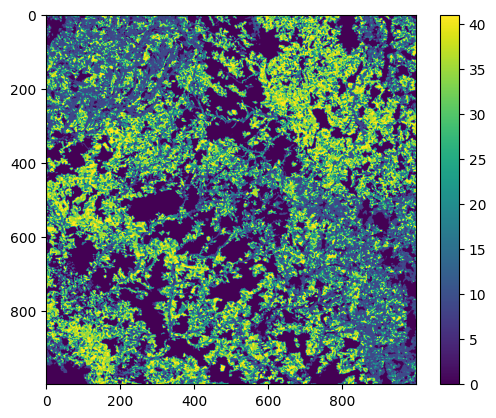

In [28]:
plt.imshow(mask[6000:7000, 6000:7000])
plt.colorbar()

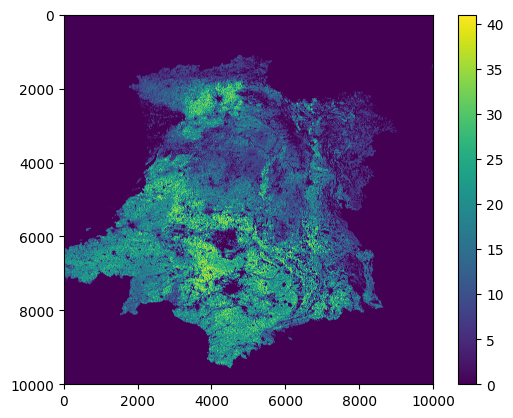

In [29]:
plt.imshow(mask)
plt.colorbar()

In [31]:
mask1 = np.flip(mask, 0 )


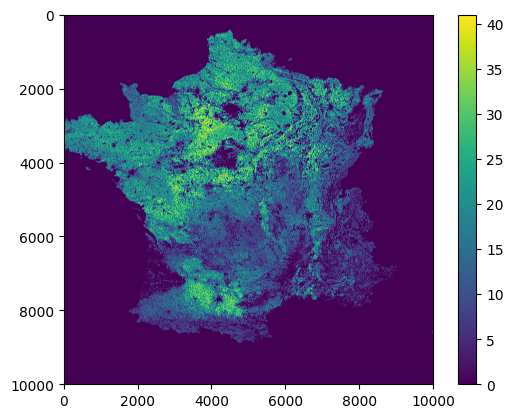

In [37]:
plt.imshow(mask1)
plt.colorbar()

In [38]:
np.save('/home/luser/UniBw-STELAR/test_saves/france_labels_image_vista_cropts.npy', mask1)

In [39]:
label_space = np.load('/home/luser/UniBw-STELAR/test_saves/france_labels_image_vista_cropts.npy')

In [40]:
np.unique(label_space)

array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 27, 28, 30, 32, 33, 34, 35, 36, 37, 40,
       41], dtype=uint8)

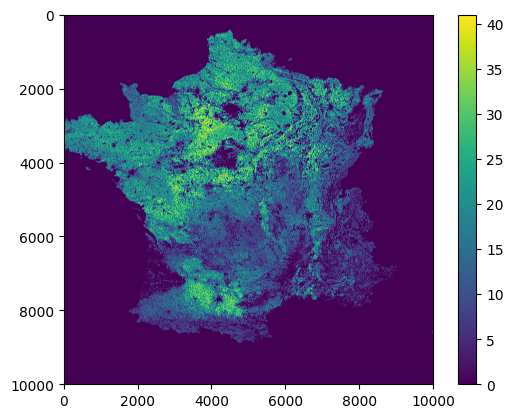

In [41]:
plt.imshow(label_space)
plt.colorbar()

# Analysis of crop Types

In [42]:
total_percents=0
crops_percent_list = []
for i in range(41):
    indiv_crop_percent = (len(label_space[label_space==i+1])/len(label_space[label_space>0])) 
    print("indiv_crop_percent", indiv_crop_percent)
    total_percents += indiv_crop_percent
    crops_percent_list.append(indiv_crop_percent)
    print("i", i)
print("total_percents", total_percents)

indiv_crop_percent 0.013899965087402596
i 0
indiv_crop_percent 0.01662620920528266
i 1
indiv_crop_percent 0.002705105048748582
i 2
indiv_crop_percent 0.004307830835626409
i 3
indiv_crop_percent 0.0001408166830858919
i 4
indiv_crop_percent 0.0
i 5
indiv_crop_percent 0.02781643057672914
i 6
indiv_crop_percent 0.05800676536358884
i 7
indiv_crop_percent 0.368568119308376
i 8
indiv_crop_percent 1.766006872583068e-05
i 9
indiv_crop_percent 0.025463234702346498
i 10
indiv_crop_percent 0.004034248870393419
i 11
indiv_crop_percent 0.030874008066576007
i 12
indiv_crop_percent 3.5717737498021525e-05
i 13
indiv_crop_percent 0.00682858199621266
i 14
indiv_crop_percent 0.00024362942840719135
i 15
indiv_crop_percent 0.0004206939823862517
i 16
indiv_crop_percent 0.0439715168604122
i 17
indiv_crop_percent 0.005980733030686805
i 18
indiv_crop_percent 0.016649700741355106
i 19
indiv_crop_percent 0.0014113807645669972
i 20
indiv_crop_percent 1.2789468157918654e-05
i 21
indiv_crop_percent 7.557714214562811

In [43]:
len(crops_percent_list)

41

41
41


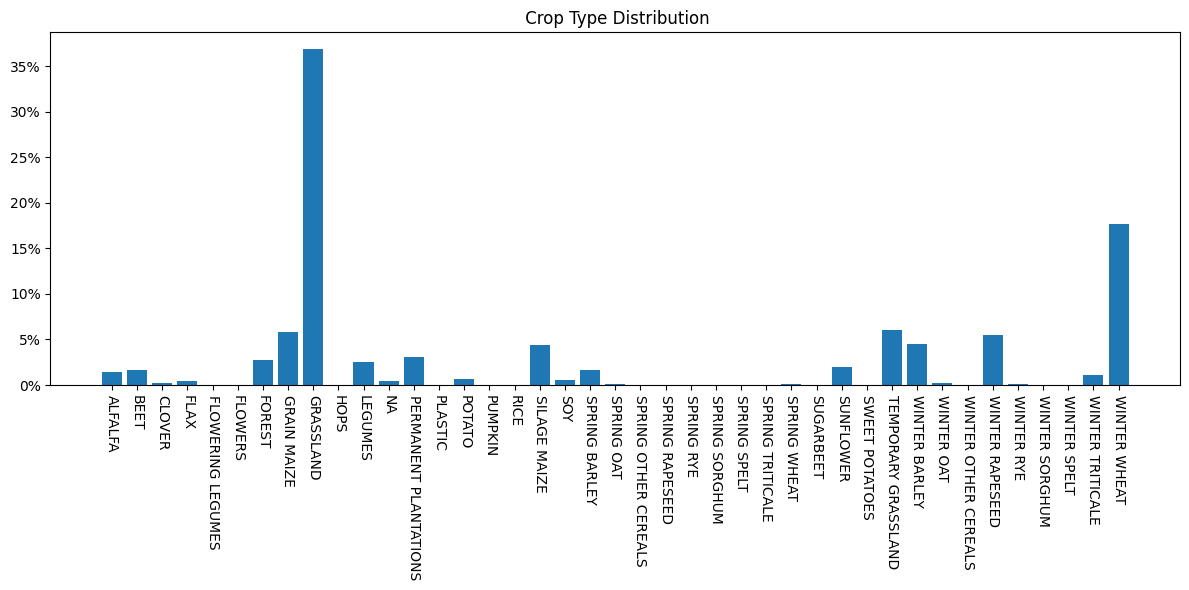

In [44]:
import matplotlib.pyplot as plt
import random
import matplotlib.ticker as mtick  # Import the ticker module

# List of categories
categories = unique_labels = [
    "ALFALFA", "BEET", "CLOVER", "FLAX", "FLOWERING LEGUMES", "FLOWERS", "FOREST",
    "GRAIN MAIZE", "GRASSLAND", "HOPS", "LEGUMES", "NA", "PERMANENT PLANTATIONS",
    "PLASTIC", "POTATO", "PUMPKIN", "RICE", "SILAGE MAIZE", "SOY", "SPRING BARLEY",
    "SPRING OAT", "SPRING OTHER CEREALS", "SPRING RAPESEED", "SPRING RYE", "SPRING SORGHUM",
    "SPRING SPELT", "SPRING TRITICALE", "SPRING WHEAT", "SUGARBEET", "SUNFLOWER",
    "SWEET POTATOES", "TEMPORARY GRASSLAND", "WINTER BARLEY", "WINTER OAT",
    "WINTER OTHER CEREALS", "WINTER RAPESEED", "WINTER RYE", "WINTER SORGHUM",
    "WINTER SPELT", "WINTER TRITICALE", "WINTER WHEAT"
]

print(len(categories))

# Generate random values for each category
random_values = crops_percent_list
print(len(random_values))
# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(categories, random_values)
#plt.xlabel("Crop Types (vista_name)")
#plt.ylabel("Crop Type Distribution")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

plt.title(" Crop Type Distribution")
plt.xticks(rotation=-90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()


In [45]:
len(label_space[label_space==0])/(label_space.shape[0]*label_space.shape[1])

0.698309858124356

In [46]:
np.unique(label_space) # 24, 25, 28, 30, 37, 38

array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 27, 28, 30, 32, 33, 34, 35, 36, 37, 40,
       41], dtype=uint8)

# Converting the image to RGB

In [48]:
# Get the colored image here

groud_truth_image = label_space
#groud_truth_image_lai = resized_label_space_reset

color_map = {
    0: [0, 0, 0],       # Black
    1: [0, 255, 0],     # Green
    2: [0, 0, 255],     # Blue
    3: [255, 255, 0],   # Yellow
    4: [255, 165, 0],   # Orange
    5: [255, 0, 255],   # Magenta
    6: [0, 255, 255],   # Cyan
    7: [128, 0, 128],   # Violet
    8: [128, 128, 0],   # Olive
    9: [0, 128, 0],     # Dark Green
    10: [128, 0, 0],    # Maroon
    11: [0, 0, 128],    # Navy
    12: [128, 128, 128],# Gray
    13: [0, 128, 128],  # Teal
    14: [255, 0, 0],    # Red
    15: [255, 255, 255],# White
    16: [192, 192, 192],# Silver
    17: [255, 0, 0],    # Red (Duplicate)
    18: [0, 255, 0],    # Green (Duplicate)
    19: [0, 0, 255],    # Blue (Duplicate)
    20: [255, 255, 0],  # Yellow (Duplicate)
    21: [255, 165, 0],  # Orange (Duplicate)
    22: [255, 0, 255],  # Magenta (Duplicate)
    23: [0, 255, 255],  # Cyan (Duplicate)
    24: [128, 0, 128],  # Violet (Duplicate)
    25: [128, 128, 0],  # Olive (Duplicate)
    26: [0, 128, 0],    # Dark Green (Duplicate)
    27: [128, 0, 0],    # Maroon (Duplicate)
    28: [0, 0, 128],    # Navy (Duplicate)
    29: [128, 128, 128],# Gray (Duplicate)
    30: [0, 128, 128],  # Teal (Duplicate)
    31: [0, 0, 0],      # Black (Duplicate)
    32: [255, 255, 255],# White (Duplicate)
    33: [192, 192, 192],# Silver (Duplicate)
    34: [255, 0, 0],    # Red (Duplicate)
    35: [0, 255, 0],    # Green (Duplicate)
    36: [0, 0, 255],    # Blue (Duplicate)
    37: [255, 255, 0],  # Yellow (Duplicate)
    38: [255, 165, 0],  # Orange (Duplicate)
    39: [255, 0, 255],  # Magenta (Duplicate)
    40: [0, 128, 255],  # Sky Blue (New Color)
    41: [255, 128, 0]   # New Color
}



# Create color plot
groud_truth_color_image = np.zeros(groud_truth_image.shape + (3,), dtype=np.uint8)
#groud_truth_color_image_lai = np.zeros(groud_truth_image_lai.shape + (3,), dtype=np.uint8)
for i in range(groud_truth_image.shape[0]):
    for j in range(groud_truth_image.shape[1]):
        segment_id_gt = groud_truth_image[i, j]
        #segment_id_gt_lai = groud_truth_image_lai[i, j]
        groud_truth_color_image[i, j] = color_map[segment_id_gt]
        #groud_truth_color_image_lai[i, j] = color_map[segment_id_gt_lai]


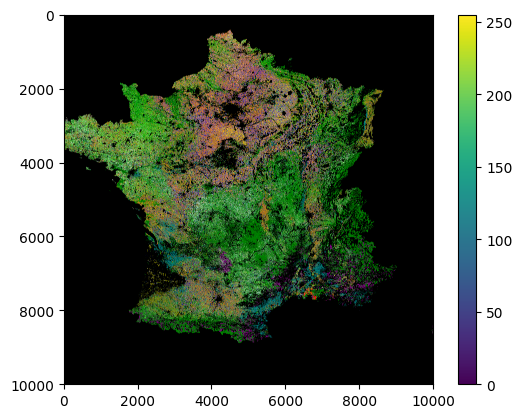

In [49]:
# plot the color image
plt.imshow(groud_truth_color_image)
plt.colorbar()

In [50]:
#np.save('/home/luser/UniBw-STELAR/test_saves/france_labels_image_vista_cropts_color.npy', groud_truth_color_image)

In [51]:
# load the color image
groud_truth_color_image = np.load('/home/luser/UniBw-STELAR/test_saves/france_labels_image_vista_cropts_color.npy')

(-0.5, 10001.5, 10001.5, -0.5)

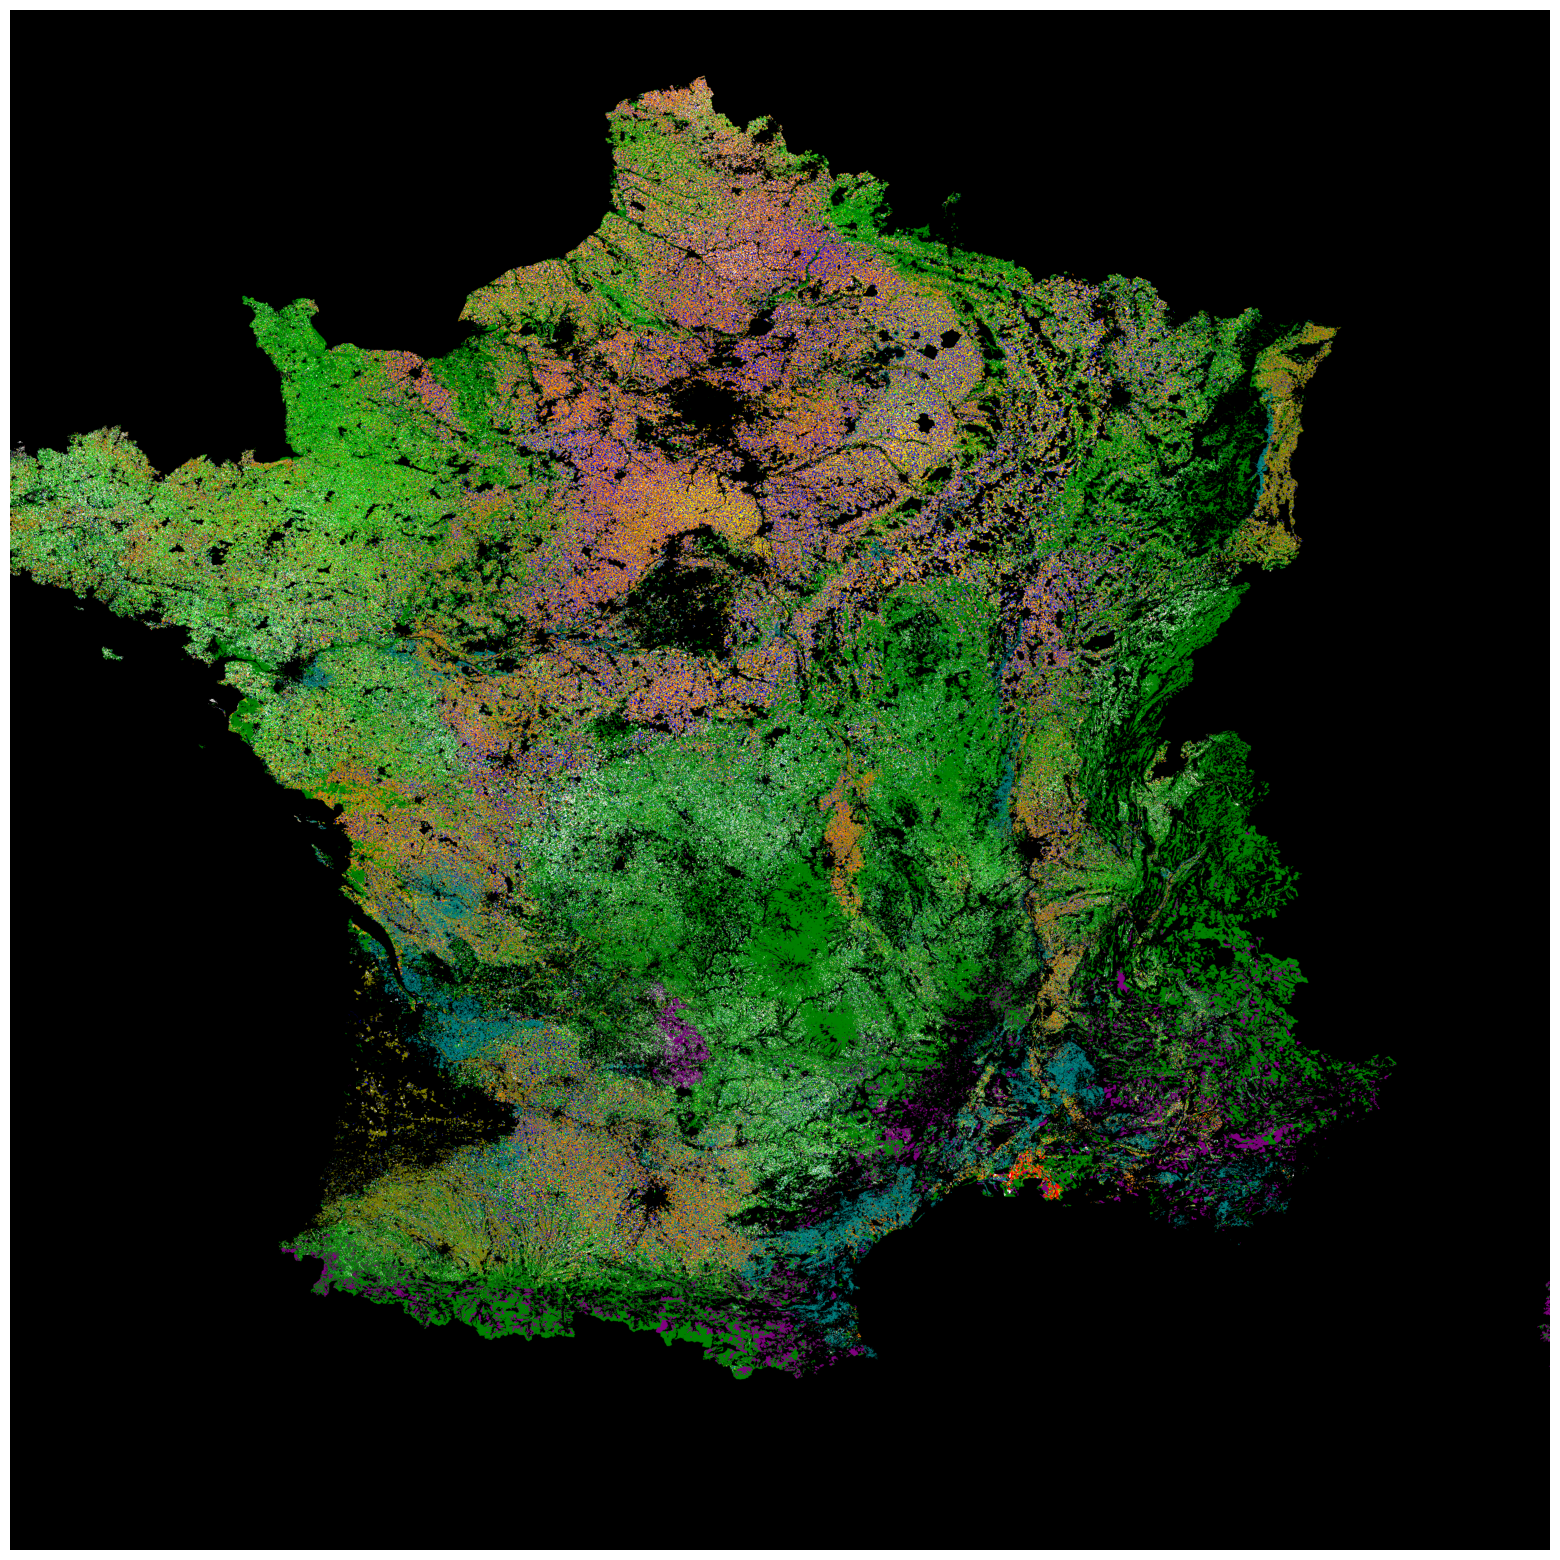

In [54]:
# plot the color image
plt.figure(figsize=(20, 20))  # Set the figure size to 10 inches wide and 8 inches tall
plt.imshow(groud_truth_color_image)
plt.axis('off')
#plt.colorbar()